In [1]:
library(data.table)
library(ggplot2)

In [2]:
subsets_analysis_dir = "/directflow/SCCGGroupShare/projects/anncuo/OneK1K/saige_eqtl/input/power_analysis_subsets/"
out_dir = paste0(subsets_analysis_dir,"gene_level_results_atleast_1pct_expressed/")
out_dir

[1] "/directflow/SCCGGroupShare/projects/anncuo/OneK1K/saige_eqtl/input/power_analysis_subsets/gene_level_results_atleast_1pct_expressed/"

In [3]:
pcts = c(1,5,10,20,50,100)
df_summary = data.frame(pct_cells = pcts)
for (pct in pcts){
    df_list = list()
    for (chrom in c(1:22)){
        file = paste0(out_dir,'chr',chrom,'_',pct,'pct.csv')
        if (file.exists(file) == FALSE){next}
        df_list[[chrom]] = as.data.frame(fread(file))
    }
    df = rbindlist(df_list) 
    df_summary[df_summary$pct_cells == pct,"n"] = nrow(df)
    df_summary[df_summary$pct_cells == pct,"n_saige_common"] = nrow(df[df$qv_saige_common<0.05,])
    df_summary[df_summary$pct_cells == pct,"n_tensor_common"] = nrow(df[df$qv_tensor_common<0.05,])
}

In [4]:
df_summary

pct_cells,n,n_saige_common,n_tensor_common
<dbl>,<int>,<int>,<int>
1,7972,77,94
5,8086,435,383
10,7894,732,624
20,8060,1206,1052
50,7805,1980,1795
100,8009,2726,2533


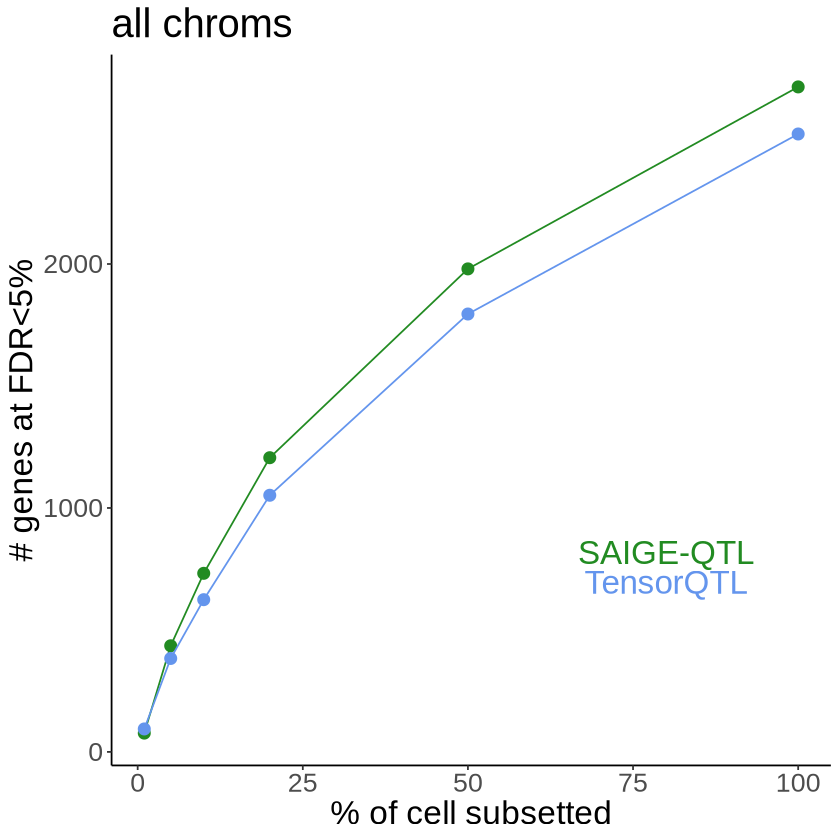

In [5]:
p = ggplot(df_summary, aes(x=pct_cells, y=n_saige_common)) 
p = p + geom_line(col="forestgreen") + geom_point(size=3, col="forestgreen")
p = p + geom_line(aes(x=pct_cells, y=n_tensor_common), col="cornflowerblue") 
p = p + geom_point(aes(x=pct_cells, y=n_tensor_common), col="cornflowerblue", size=3) 
p = p + theme_classic() + ggtitle("all chroms") + theme(text = element_text(size=20))
p = p + xlab("% of cell subsetted") + ylab("# genes at FDR<5%")
ypos = max(df_summary$n_saige_common)*0.3 
p = p + annotate("text", label = "SAIGE-QTL", x=80, y=ypos, col="forestgreen", size=7)
p = p + annotate("text", label = "TensorQTL", x=80, y=ypos*0.85, col="cornflowerblue", size=7)
p

In [6]:
fig_dir <- "/directflow/SCCGGroupShare/projects/anncuo/OneK1K/saige_eqtl/ms_figures/"
pdf(paste0(fig_dir,"saigeqtl_vs_tensorqtl_downsampling.pdf"), width=8, height=8)
p
dev.off()

png 
  2